<a href="https://colab.research.google.com/github/myconcordia/COMP478/blob/main/Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Extraction**

Feature detection is the process of identifying distinctive and repeatable patterns or structures in an image or video, known as features or keypoints. Features are points, edges, corners, or blobs that have certain properties, such as being invariant to scale, rotation, and illumination changes. Feature detection is a fundamental step in many computer vision tasks, such as object recognition, tracking, 3D reconstruction, and augmented reality.

The process of feature detection typically involves the following steps:

**Image preprocessing:** This involves converting the input image to a suitable format for feature detection, such as grayscale, smoothing, or normalization.

**Feature detection:** This involves identifying distinctive patterns or structures in the image that can be used for further processing. This can be done using various methods, such as edge detection, corner detection, blob detection, or template matching. The choice of the method depends on the type of features in the image and the requirements of the application.

**Feature description:** This involves extracting relevant information about the detected features, such as their location, scale, orientation, and descriptor. Descriptors are numerical representations of the features that capture their local appearance and geometry, and are used to match them across different images or frames.

**Feature matching:** This involves finding correspondences between the detected features in different images or frames. This can be done using various methods, such as nearest neighbor matching, RANSAC, or geometric constraints. Feature matching is a critical step in many computer vision applications, such as object recognition, stereo vision, and motion tracking.

Feature detection is a challenging task because features can vary widely in appearance, scale, orientation, and illumination, and can be occluded or distorted. Therefore, many feature detection algorithms have been developed over the years, each with its strengths and weaknesses. Some popular feature detection algorithms include SIFT, SURF, ORB, and FAST.

**Import Python modules**

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
#Second change your current folder to point working folder My Drive
import os
os.chdir("/content/drive/My Drive/")
os.listdir()

['Colab Notebooks', 'data', 'images', 'trimesh', 'Ericsson', 'amazon']

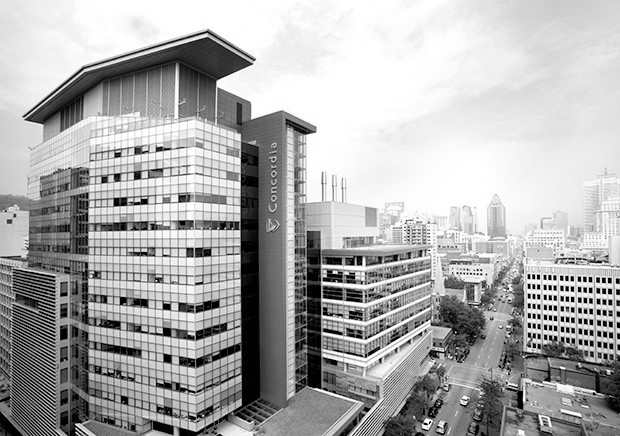

In [ ]:
# Load image
img = cv2.imread('./images/concordia.jpg')

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display image
cv2_imshow(gray)

**Harris corner detection**

Harris corner detection aims to detect points in an image that represent corners, which are distinct points where the intensity of the image changes in multiple directions. Corners are useful features for various applications, such as object recognition, image stitching, and motion tracking. The Harris corner detector works by analyzing the local variations in intensity in small neighborhoods of an image. Specifically, it calculates a "cornerness" score for each pixel based on how much the intensity changes in different directions. If the score is high enough, the pixel is considered a corner.

If the cornerness score R is high enough, the pixel is considered a corner. To reduce the number of false positives, a threshold is applied to the scores, and non-maximum suppression is performed to keep only the highest-scoring corners in a local neighborhood.

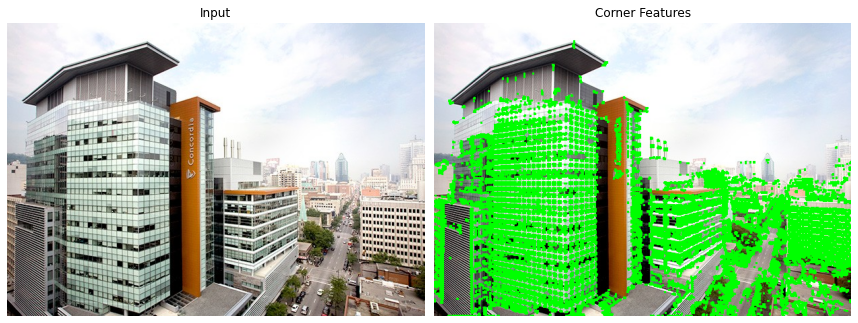

In [ ]:
img = cv2.imread('./images/concordia.jpg')
Im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Harris corner detection
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate corner image to enhance corner points (not important)
dst = cv2.dilate(dst, None)

# Threshold
thresh = 0.001*dst.max()
img[dst > thresh] = [0, 255, 0]

# Display the image
fig, axs = plt.subplots(1, 2, figsize=(12, 12))
plt.subplot(121), plt.imshow(Im), plt.title('Input'), plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Corner Features'), plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

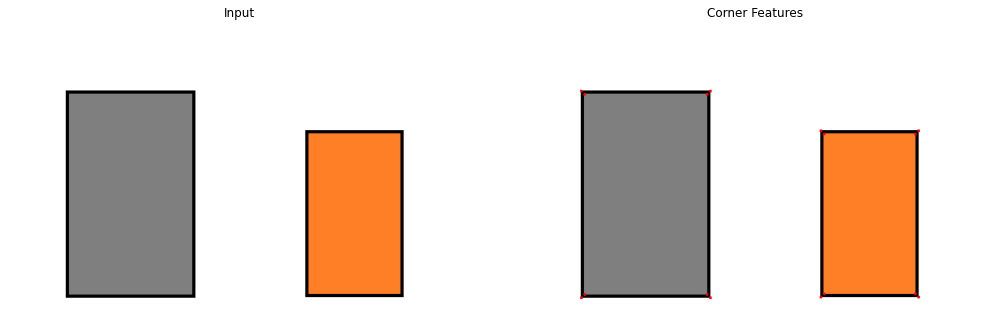

In [25]:
img = cv2.imread('./images/rectangles.png')
Im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Harris corner detection
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate corner image to enhance corner points (not important)
dst = cv2.dilate(dst, None)

# Threshold
thresh = 0.025*dst.max()
img[dst > thresh] = [0, 0, 255]

# Display the image
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
plt.subplot(121), plt.imshow(Im), plt.title('Input'), plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Corner Features'), plt.axis('off')
plt.tight_layout(pad=5)
plt.show()

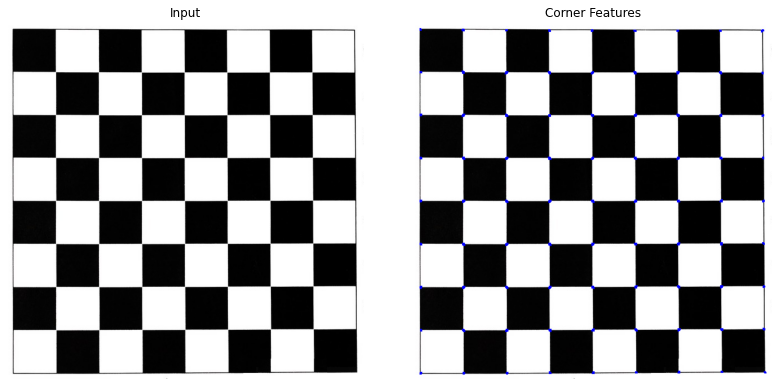

In [21]:
img = cv2.imread('./images/checkerboard.png')
Im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Harris corner detection
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate corner image to enhance corner points (not important)
dst = cv2.dilate(dst, None)

# Threshold
thresh = 0.025*dst.max()
img[dst > thresh] = [255, 0, 0]

# Display the image
fig, axs = plt.subplots(1, 2, figsize=(12, 12))
plt.subplot(121), plt.imshow(Im), plt.title('Input'), plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Corner Features'), plt.axis('off')
plt.tight_layout(pad=5)
plt.show()

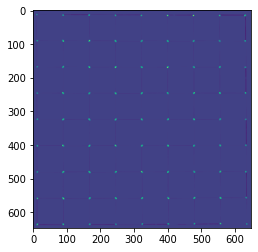

In [12]:
plt.imshow(dst)

**Harris corner detection:** Alternative method

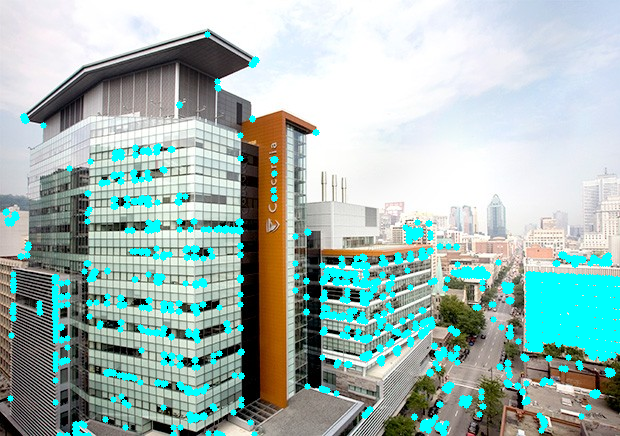

In [ ]:
# Load image
img = cv2.imread('./images/concordia.jpg')

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define parameters for Harris corner detection
blockSize = 2
ksize = 3
k = 0.04
threshold = 0.35

# Detect corners using Harris corner detection
dst = cv2.cornerHarris(gray, blockSize, ksize, k)

# Normalize result for display
dst_norm = np.empty_like(dst)
cv2.normalize(dst, dst_norm, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# Convert result to uint8 type
dst_norm = np.uint8(dst_norm)

# Find corners above threshold and draw them on original image
corners = np.argwhere(dst_norm > threshold * 255)
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (y, x), 3, (255, 255, 0), -1)

# Display result
cv2_imshow(img)

Here, we first load an image and convert it to grayscale. We then define the parameters for Harris corner detection, including the block size, aperture size, Harris parameter k, and threshold. We apply the **cv2.cornerHarris()** function to the grayscale image to obtain a corner response map. We then normalize the result for display and convert it to uint8 type. We find corners above the threshold and draw them on the original image using **cv2.circle()**. Finally, we display the result.

**Scale-Invariant Feature Transform (SIFT)**

In this example, we first load the input image and convert it to grayscale. We then initialize the SIFT detector using **cv2.xfeatures2d**.**SIFT_create()**, detect keypoints and compute descriptors using **sift.detectAndCompute()**, and draw the keypoints on the image using **cv2.drawKeypoints()**.

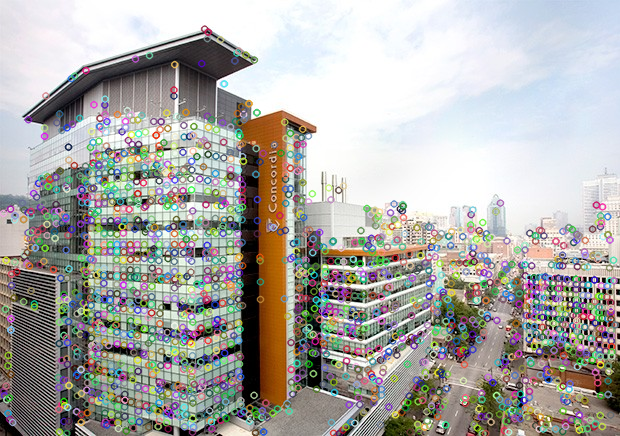

In [ ]:
# Load image
img = cv2.imread('./images/concordia.jpg')

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# Detect keypoints and compute descriptors
kp, des = sift.detectAndCompute(gray, None)

# Draw keypoints on image
result = cv2.drawKeypoints(img, kp, None)

# Display SIFT Feature result
cv2_imshow(result)

In this example, we first load two images and convert them to grayscale. We then initialize the SIFT detector using **cv2.xfeatures2d.SIFT_create()**, detect keypoints and compute descriptors using **sift.detectAndCompute()**, and match descriptors using **FLANN** with a ratio test to filter out false matches.

Finally, we draw the matched keypoints using **cv2.drawMatches()**, and display the result.

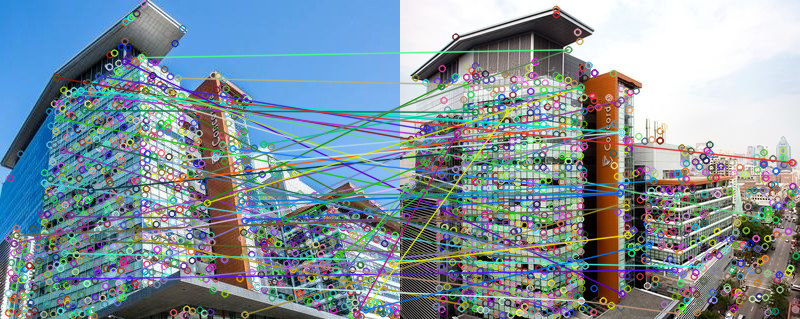

In [ ]:
# Load two images
img1 = cv2.imread('./images/EV1.jpg')
img2 = cv2.imread('./images/EV2.jpg')

# Convert images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Initialize FLANN matcher
flann = cv2.FlannBasedMatcher()

# Match descriptors using FLANN
matches = flann.knnMatch(des1, des2, k=2)

# Filter matches using ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        good_matches.append(m)

# Draw matched keypoints
result = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)

# Display result
cv2_imshow(result)




**Histogram of Oriented Gradients**

In this example, we first load the input image and convert it to grayscale. We then initialize the HOG descriptor using **cv2.HOGDescriptor()** with specified parameters for window size, block size, block stride, cell size, and number of histogram bins.

We then compute the HOG descriptor using **hog.compute()**, reshape the descriptor to a 2D array, and normalize the descriptor to obtain a feature vector. Finally, we display the result.

In [ ]:
# Load image
img = cv2.imread('./images/cameraman.png')

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialize HOG descriptor
win_size = (64, 64)  # window size for HOG descriptor
block_size = (16, 16)  # block size for HOG descriptor
block_stride = (8, 8)  # stride for HOG descriptor
cell_size = (8, 8)  # cell size for HOG descriptor
nbins = 9  # number of histogram bins for HOG descriptor
hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)

# Compute HOG descriptor
hist = hog.compute(gray)

# Reshape descriptor to 2D array
hist = hist.reshape(-1, nbins)

# Normalize descriptor
eps = 1e-7  # small value to avoid division by zero
hist /= (hist.sum(axis=1, keepdims=True) + eps)

# Display HOG Descriptor result
cv2_imshow(hist)

**Binary Robust Independent Elementary Features (BRIEF)**

This example shows the computation of BRIEF descriptors with the help of CenSurE detector.

32
(293, 32)


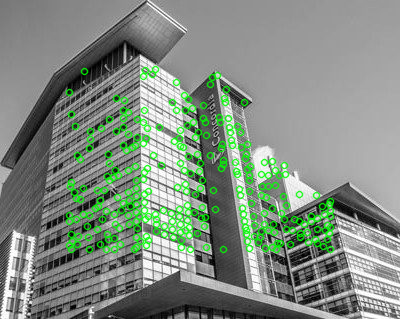

In [ ]:
img = cv2.imread('./images/EV1.jpg', cv2.IMREAD_GRAYSCALE)
# Initiate FAST detector
star = cv2.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kp = star.detect(img,None)
# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)
print( brief.descriptorSize() )
print( des.shape )

img_kp = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0))
cv2_imshow(img_kp)

In this example, we first load two grayscale images img1 and img2. Then, we create a BRIEF descriptor extractor using the **cv2.xfeatures2d.BriefDescriptorExtractor_create()** function. We detect keypoints and compute descriptors for each image using the **Compute()** function of the BRIEF descriptor extractor. Next, we match the descriptors using a brute force matcher and sort the matches by distance. Finally, we draw the first 10 matches using the **cv2.drawMatches()** function and display the resulting image.

Note that the **cv2.xfeatures2d.BriefDescriptorExtractor_create()** function takes several optional parameters, such as the patch size and the number of tests. 

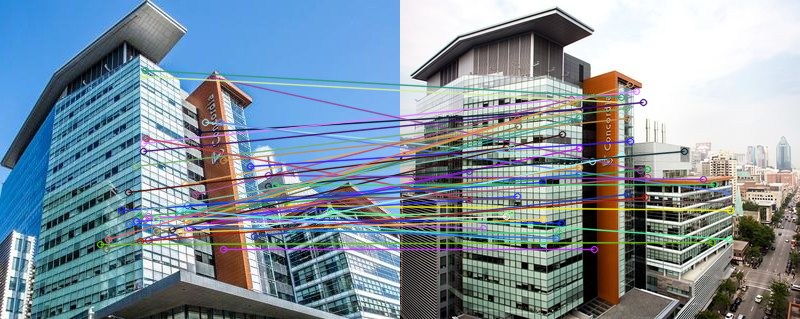

In [ ]:
# Load two images
img1 = cv2.imread('./images/EV1.jpg')
img2 = cv2.imread('./images/EV2.jpg')

# Initiate FAST detector
star = cv2.xfeatures2d.StarDetector_create()

# Create BRIEF descriptor extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with STAR
kp1 = star.detect(img1,None)
kp2 = star.detect(img2,None)

# Compute descriptors
kp1, desc1 = brief.compute(img1, kp1)
kp2, desc2 = brief.compute(img2, kp2)

# Match descriptors using brute force matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(desc1, desc2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw first 50 BRIEF matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv2_imshow(img_matches)

**Oriented FAST and Rotated BRIEF (ORB)**

Oriented FAST and Rotated BRIEF (ORB) is a feature detection and description algorithm in computer vision that is designed to be efficient and robust to rotational changes in the input images. It combines the strengths of the FAST corner detector and the BRIEF descriptor. OpenCV provides a built-in implementation of the ORB algorithm that can be used for feature detection and description.

In this example, we first load an image img. Then, we create an ORB detector using the **cv2.ORB_create()** function. We detect keypoints and compute descriptors for the image using the *detectAndCompute()* function of the ORB detector. Next, we draw the keypoints on the image using the **cv2.drawKeypoints()** function and display the resulting image.

Note that the **cv2.ORB_create()** function takes several optional parameters, such as the number of features to detect and the scale factor. These parameters can be set using the **cv2.ORB_create()** function, as shown below:

orb = cv2.ORB_create(nfeatures=1000, scaleFactor=1.2)

where we set the maximum number of features to 1000 and the scale factor to 1.2.

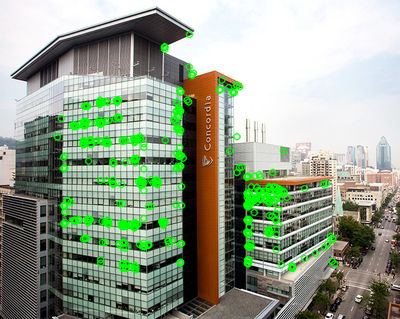

In [ ]:
# Load image
img = cv2.imread('./images/EV2.jpg')

# Create ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
kp, desc = orb.detectAndCompute(img, None)

# Draw keypoints on image
img_kp = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=cv2.DrawMatchesFlags_DEFAULT)

# Display image with ORB keypoints
cv2_imshow(img_kp)

In this example, we first load two grayscale images img1 and img2. Then, we create an ORB detector using the **cv2.ORB_create()** function. We detect keypoints and compute descriptors for both images using the **detectAndCompute()** function of the ORB detector. Next, we match the descriptors using a brute force matcher and sort the matches by distance. Finally, we draw the first 10 matches using the **cv2.drawMatches()** function and display the resulting image.

Note that in the **cv2.drawMatches()** function, we set the flags parameter to **cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS** to avoid drawing single keypoints that do not have a match in the other image. This results in only drawing matched keypoints in the image.

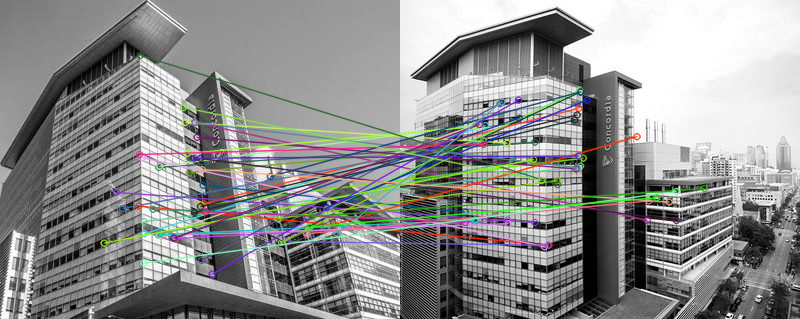

In [ ]:
# Load images
img1 = cv2.imread('./images/EV1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./images/EV2.jpg', cv2.IMREAD_GRAYSCALE)

# Create ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors for both images
kp1, desc1 = orb.detectAndCompute(img1, None)
kp2, desc2 = orb.detectAndCompute(img2, None)

# Match descriptors using brute force matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(desc1, desc2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw first 50 ORB matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv2_imshow(img_matches)